In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [143]:
os.listdir('dataset/California_Housing Prices')

['housing.csv']

In [144]:
df =pd.read_csv('dataset/California_Housing Prices/housing.csv')

In [85]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
## Handle Missing Values
df.isnull().sum().sort_values(ascending=True)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
total_bedrooms        207
dtype: int64

In [8]:
df['total_bedrooms'].min(),df['total_bedrooms'].mean(),df['total_bedrooms'].mode(), df['total_bedrooms'].max(),

(1.0,
 537.8705525375618,
 0    280.0
 Name: total_bedrooms, dtype: float64,
 6445.0)

In [152]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['total_bedrooms'] =imp.fit_transform(df[['total_bedrooms']])

C:\Users\gazur\Anaconda3\envs\polyfins_intern_work\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



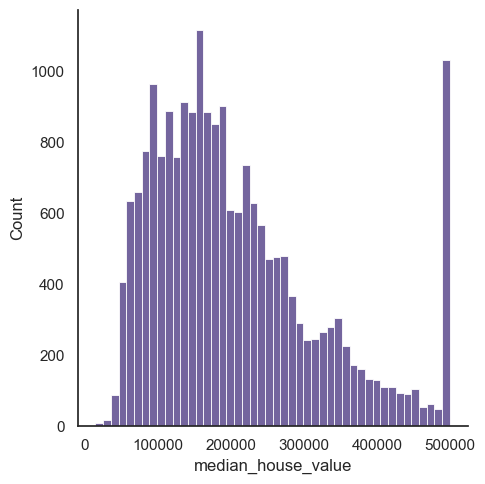

In [97]:
sns.displot(df, x="median_house_value")

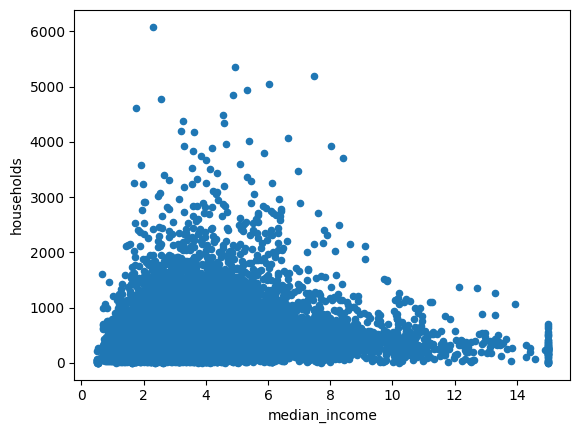

In [11]:
df.plot(kind = "scatter",x="median_income",y = "households")
plt.show()

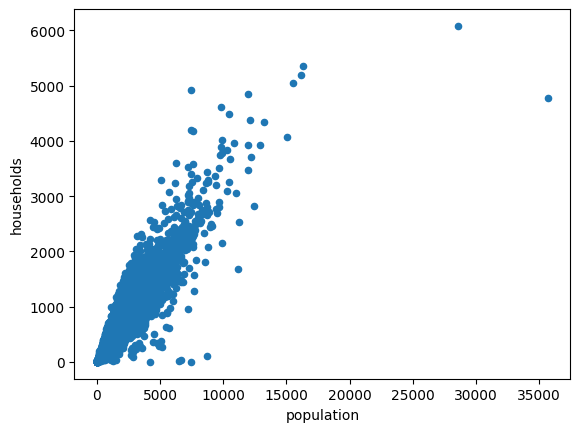

In [12]:
df.plot(kind = "scatter",x="population",y = "households")
plt.show()

In [14]:
sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')
numerical_features =df.columns[:-1]

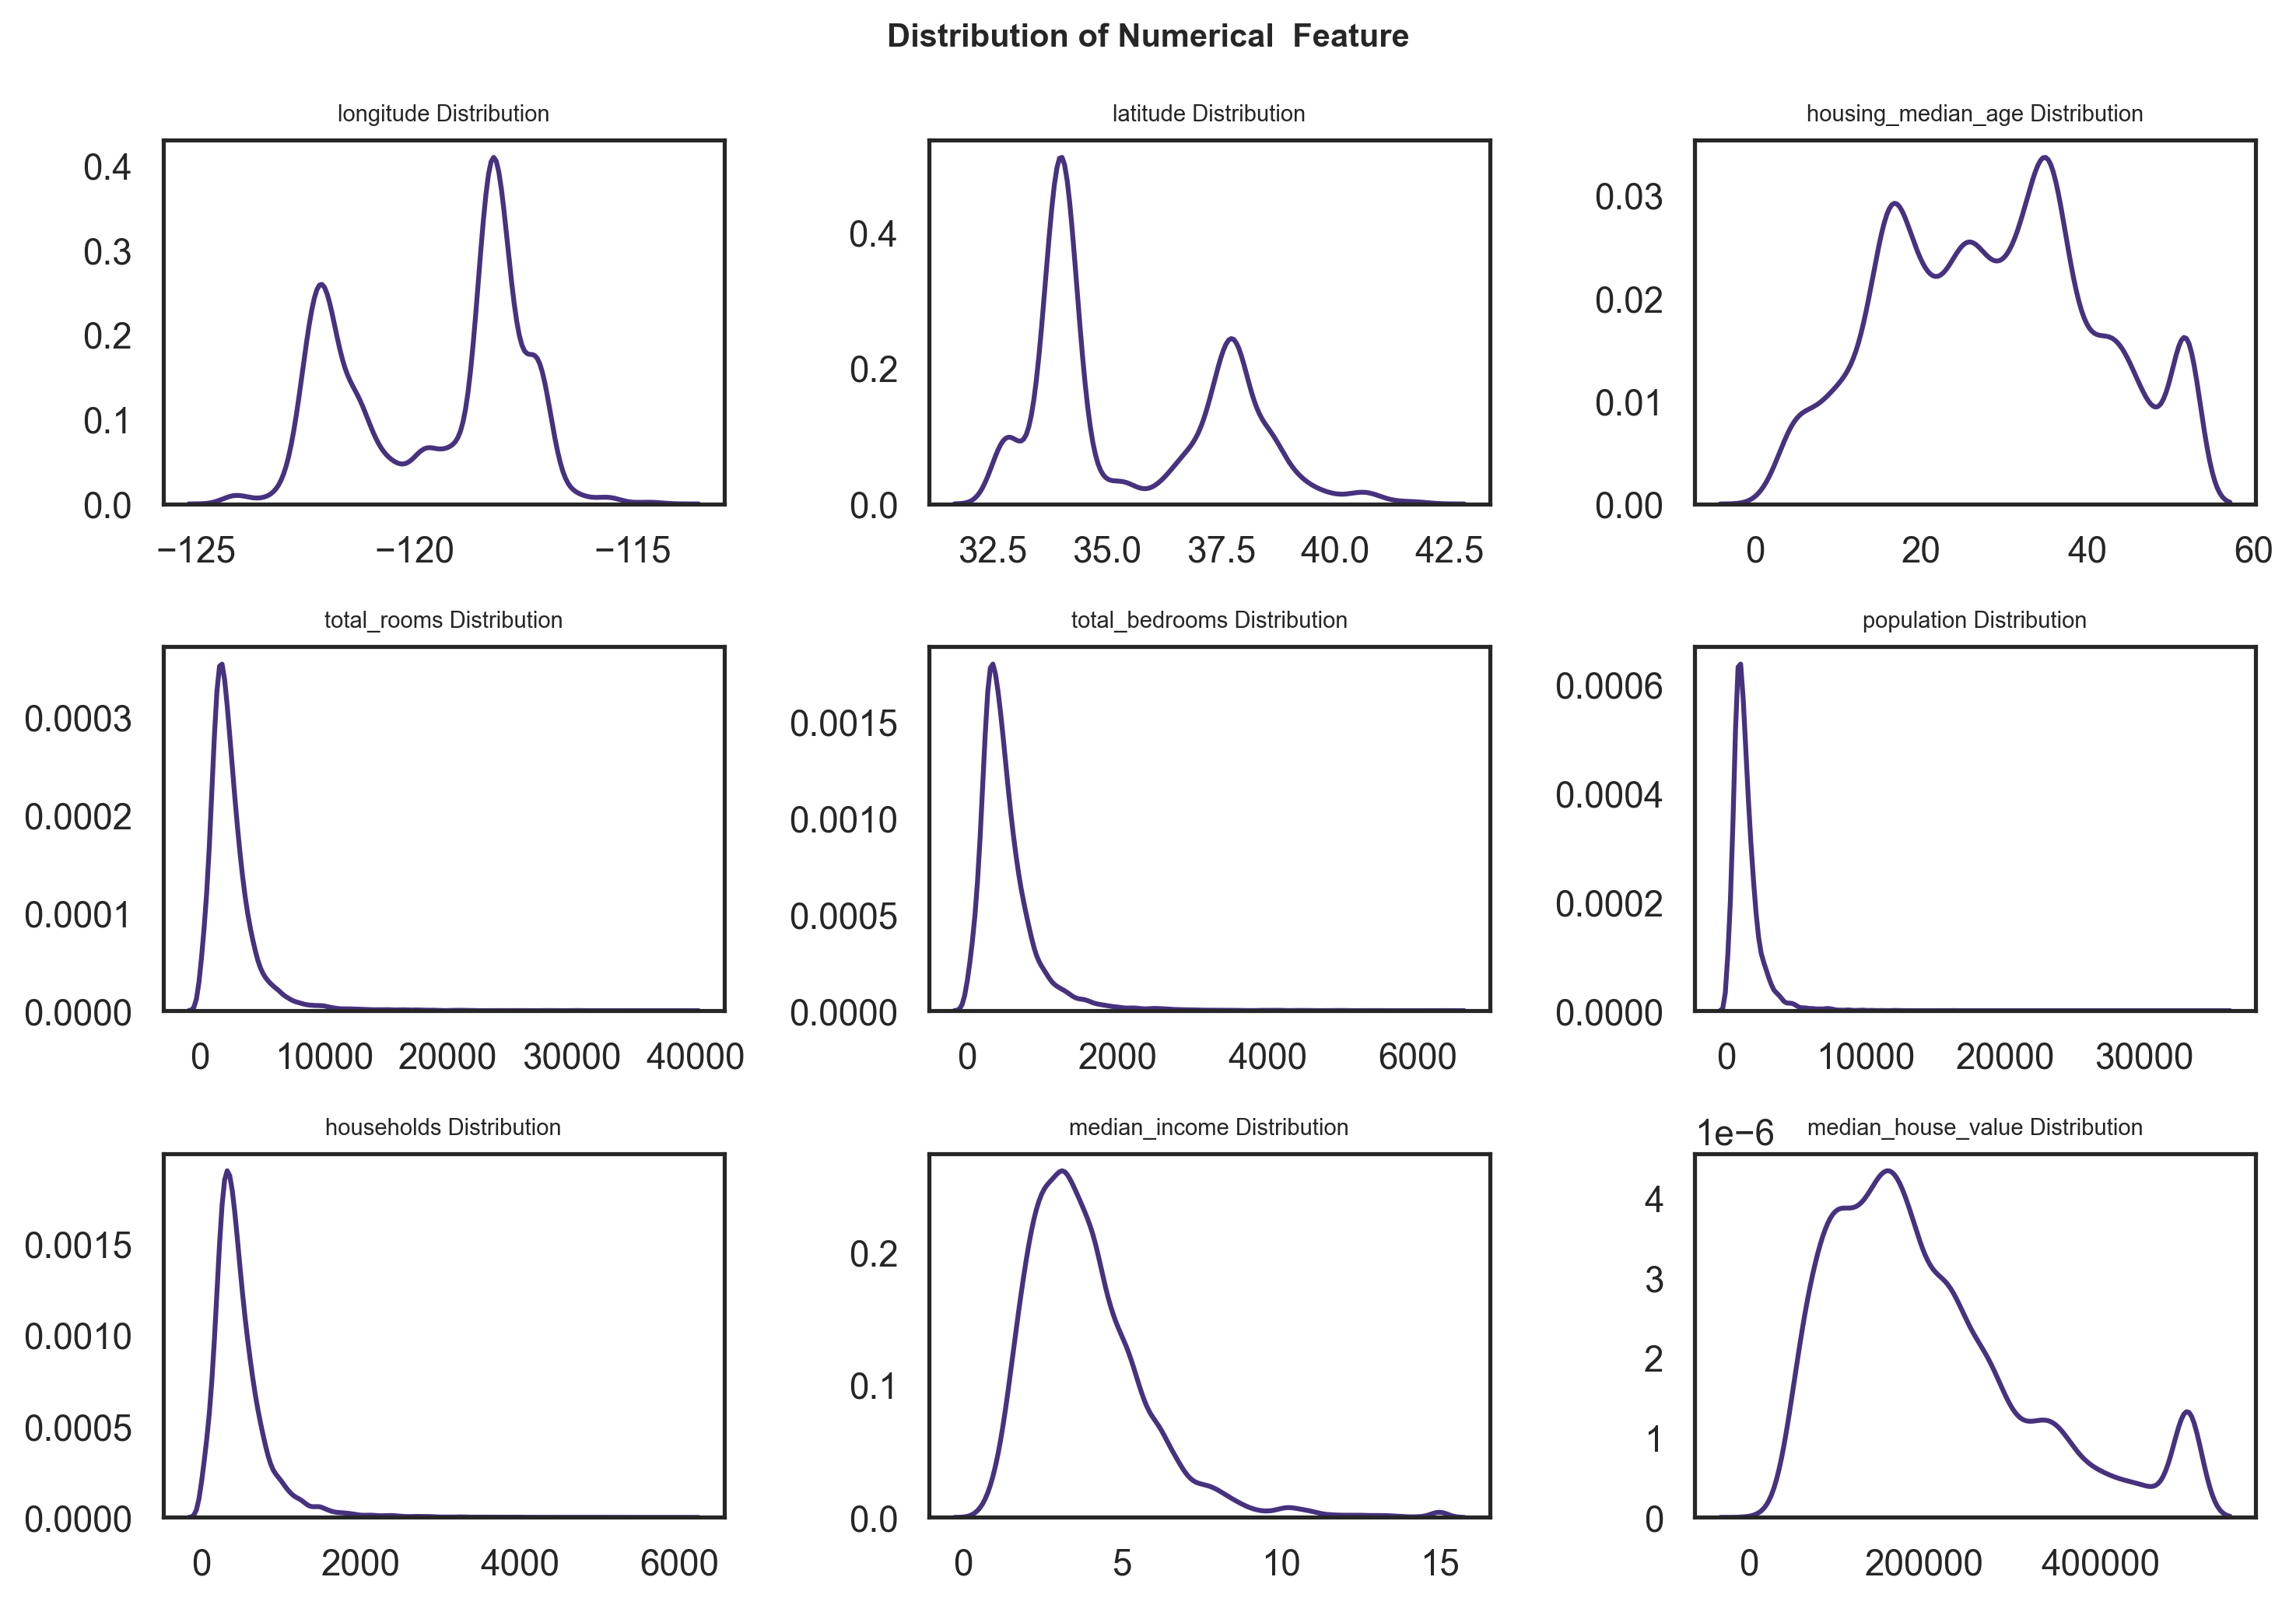

In [15]:
fig, ax = plt.subplots(3, 3, figsize = (10, 7), dpi = 300)
ax = ax.flatten()
for i, column in enumerate(numerical_features):
    sns.kdeplot(df[column], ax=ax[i], color=pal[0])    
    ax[i].set_title(f'{column} Distribution', size = 7)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    
fig.suptitle('Distribution of Numerical  Feature', fontsize = 10, fontweight = 'bold')
plt.tight_layout()

C:\Users\gazur\Anaconda3\envs\polyfins_intern_work\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\gazur\AppData\Local\Temp\ipykernel_13228\491216828.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


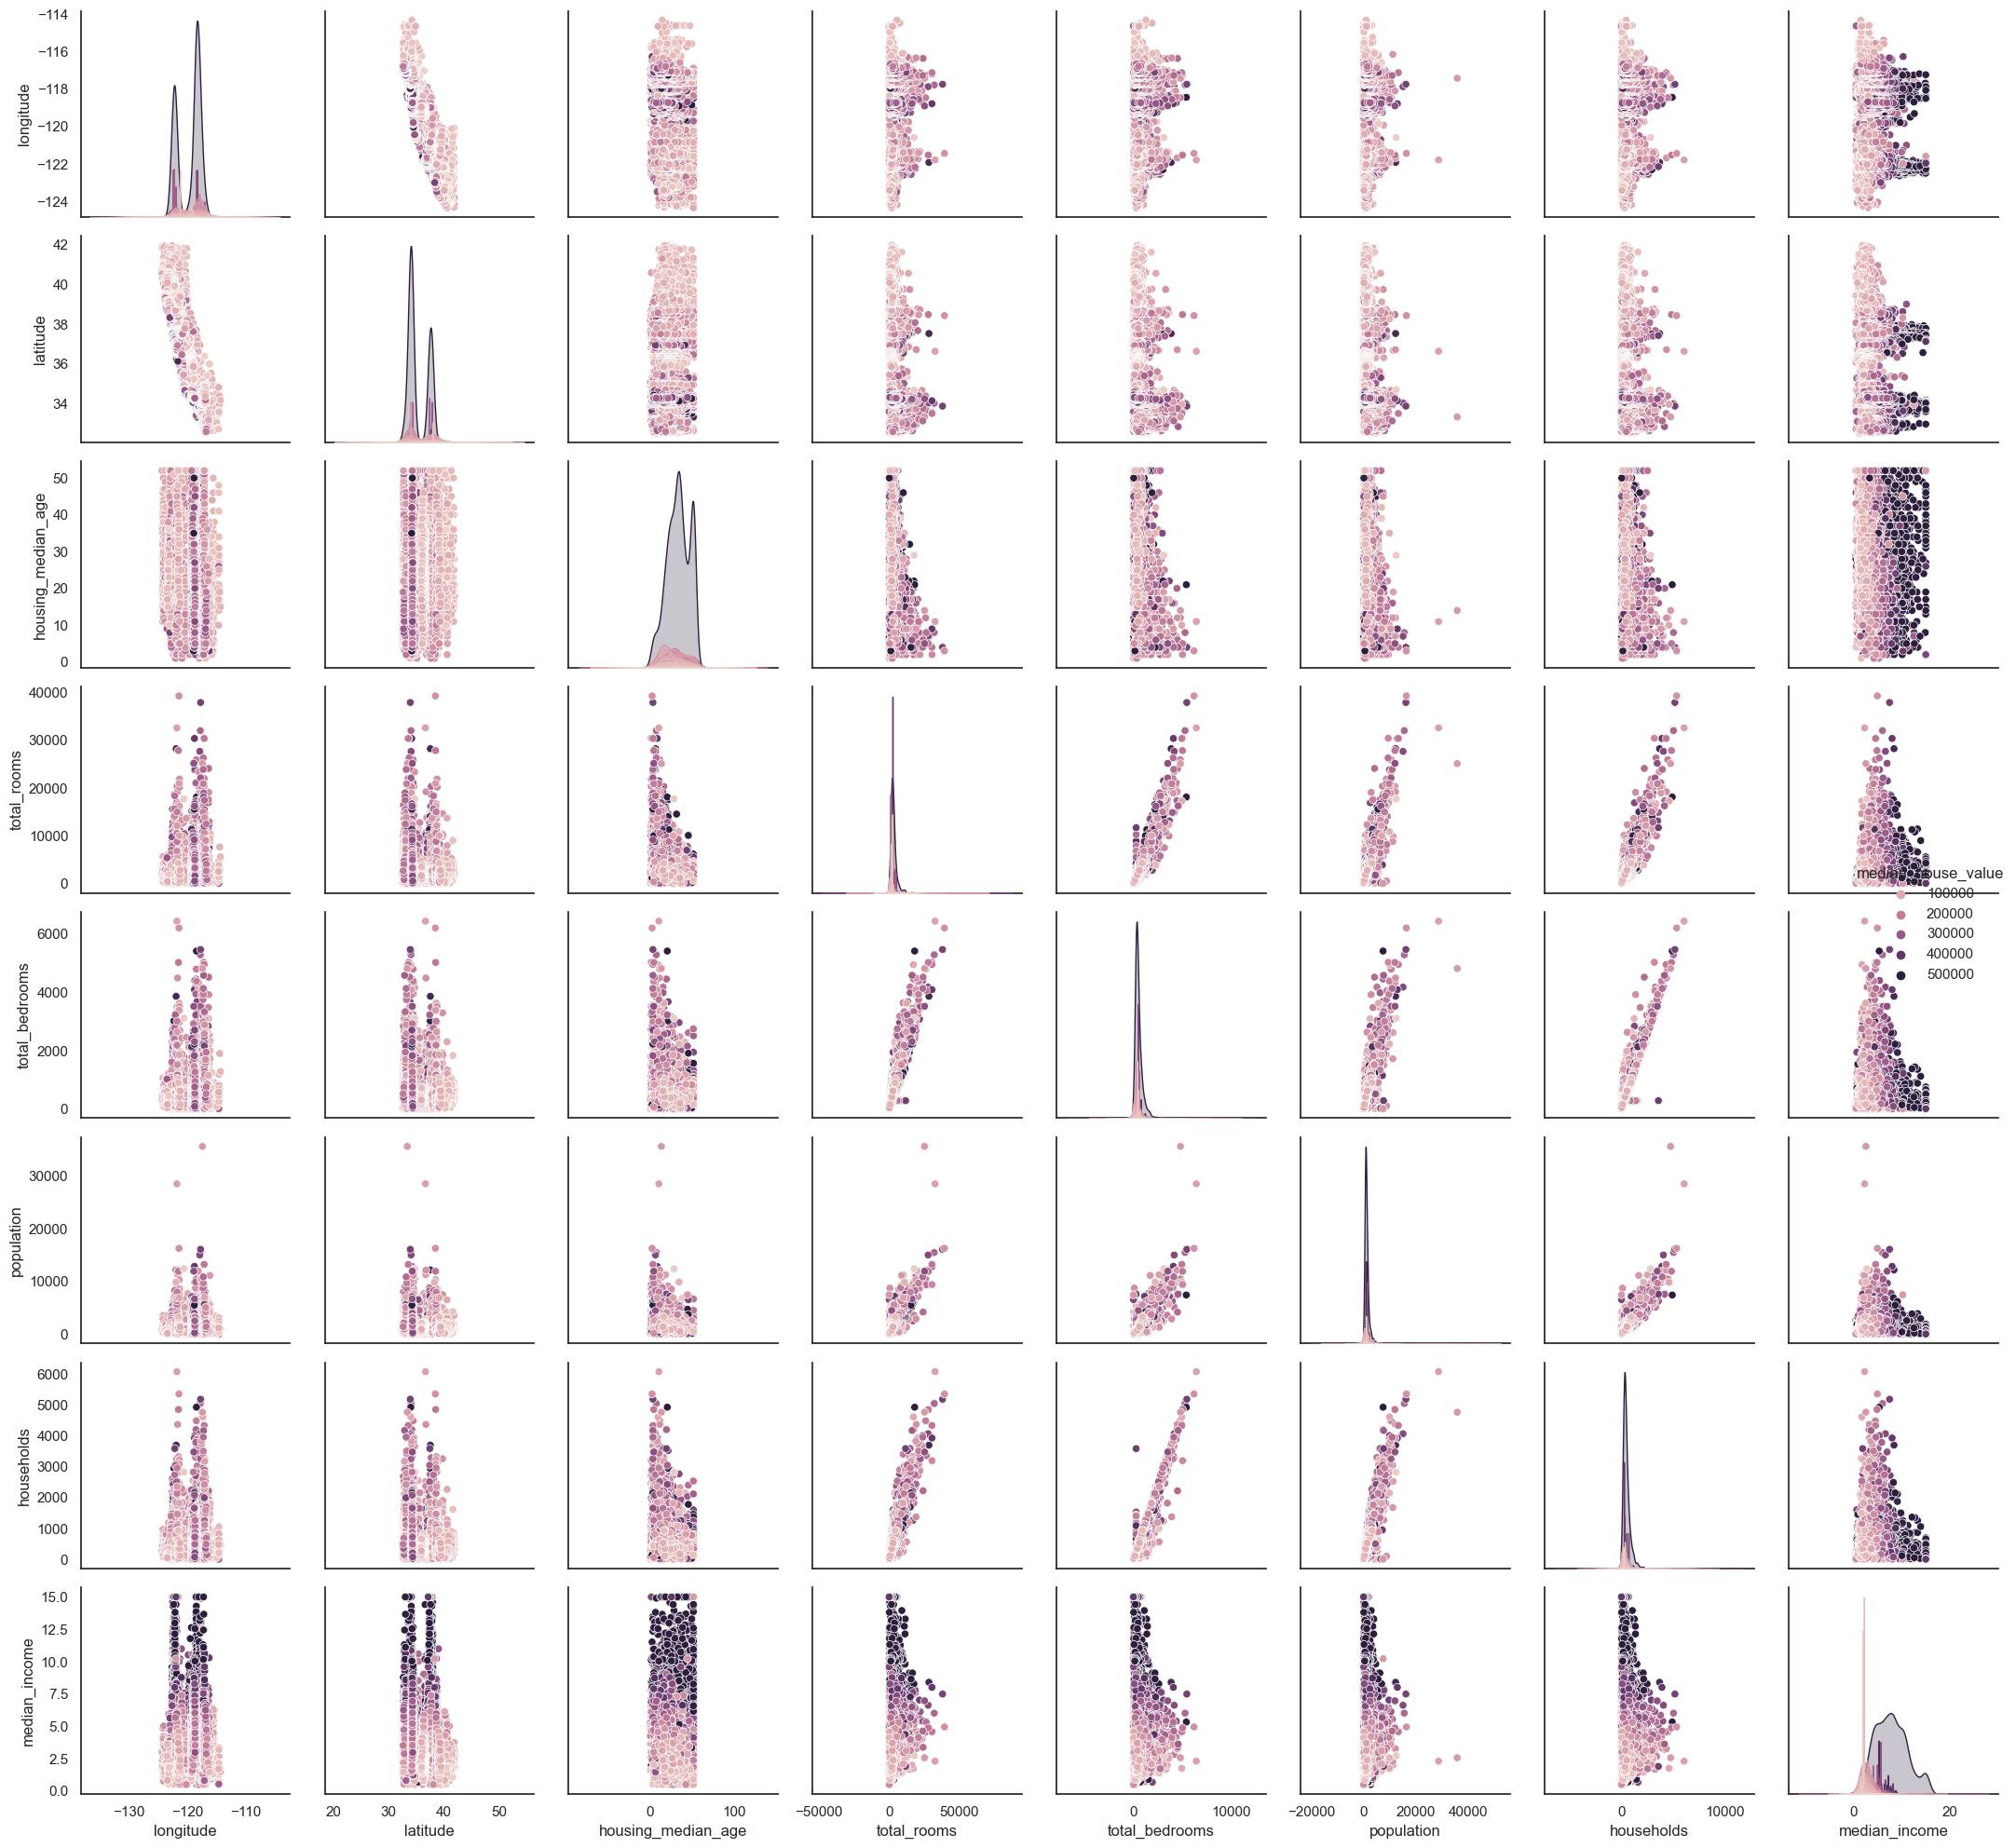

In [62]:
# sns.pairplot(df, hue="median_house_value", kind="kde")
# plt.tight_layout()
sns.pairplot(df, hue="median_house_value", kind="scatter")
plt.tight_layout()

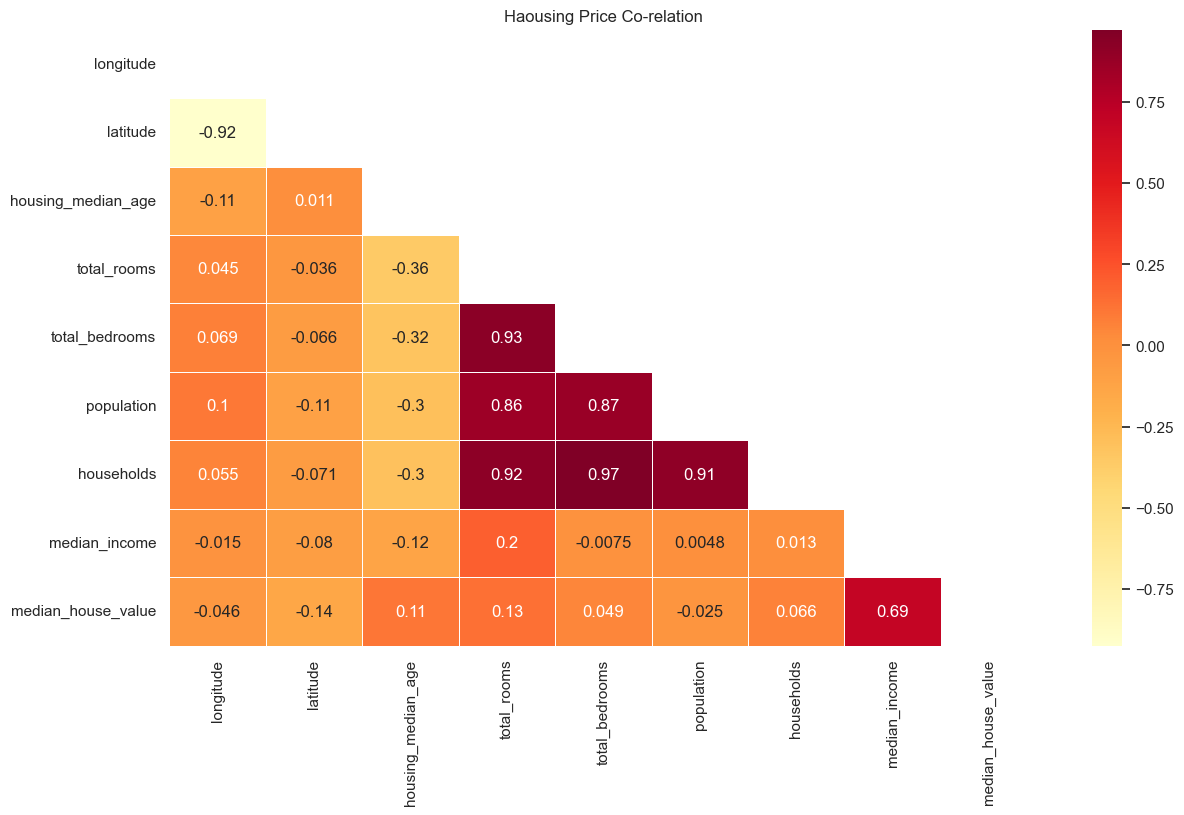

In [16]:
corr = df.drop('ocean_proximity', axis=1).corr()
fig, axes = plt.subplots(figsize=(14, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True)
plt.title("Haousing Price Co-relation")
plt.show()

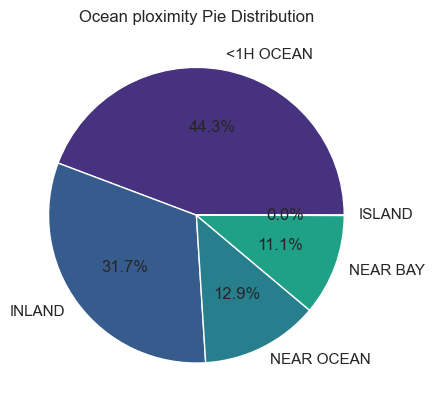

In [17]:
# Counting the occurrences of each ocean_proximity
ocean_ploximity= df['ocean_proximity'].value_counts()

# Plotting the pie chart
plt.pie(ocean_ploximity, labels=ocean_ploximity.index, autopct='%1.1f%%')

# Customizing the chart
plt.title('Ocean ploximity Pie Distribution')
# plt.savefig('Ocean ploximity pie chart.png', dpi=300, bbox_inches='tight')
plt.show()

<Axes: >

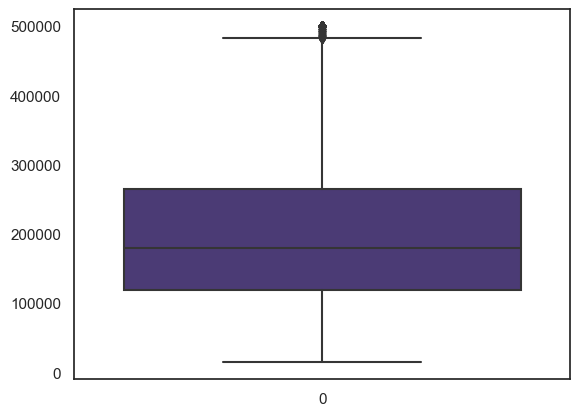

In [18]:
#checking outliers
sns.boxplot(df['median_house_value'])

In [150]:
#outlier detection and remove
q3 = df['median_house_value'].quantile(0.75)   
q2 = df['median_house_value'].quantile(0.25)
iqr = q3 - q2
upper_threshold = q3 + 1.5 * iqr
df.loc[df['median_house_value'] > upper_threshold, 'median_house_value'] = upper_threshold

In [151]:
# Define the mapping dictionary
ocean_proximity = {
    '<1H OCEAN': 0,
    'INLAND': 1,
    'NEAR OCEAN': 2,
    'NEAR BAY': 3,
    'ISLAND' : 4
}

df['ocean_proximity'] = df['ocean_proximity'].map(ocean_proximity)

#### Feature Engineering

In [154]:
df.loc[df['housing_median_age'] <= 5, 'Age_Range'] = 1
df.loc[(df['housing_median_age'] > 5) & (df['housing_median_age'] <= 18) , 'Age_Range'] = 2 
df.loc[(df['housing_median_age'] > 18) & (df['housing_median_age'] <= 40) , 'Age_Range'] = 3
df.loc[df['housing_median_age'] > 40, 'Age_Range'] = 3
df['room_person']=df['population']/df['total_rooms']
df['bedroom_ratio']=df['total_bedrooms']/df['total_rooms'] * 100
df["rooms_per_household"]=df["total_rooms"]/df["households"]
df["population_per_householed"]=df["population"]/df["households"]
df["bedrooms_per_household"]=df["total_bedrooms"]/df["households"]
df['lon_plus_lat'] = df['longitude'] + df['latitude'] 
df['var_max_lat'] = df['latitude'].max() - df['latitude']
df['var_max_long'] = df['longitude'].max() - df['longitude']

In [155]:
from scipy.stats import zscore

def remove_outliers(df, z_thresh=3):  # common choice
    numeric_cols = df.select_dtypes('number')
    z_scores = numeric_cols.apply(zscore)
    outlier_indices = (z_scores > z_thresh).any(axis=1)
    # Remove the outliers from the DataFrame
    df_no_outliers = df.loc[~outlier_indices]
    return df_no_outliers
df1 = remove_outliers(df)

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [157]:
X = df1.drop('median_house_value', axis=1)  
y = df1['median_house_value'] 
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=0.2, random_state=0)

#### Linear Regression

In [158]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
lr_score = r2_score(y_test, y_pred)
lr_score

0.6681111553308576

#### SVM

In [159]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X1=sc.fit_transform(X_train)
X2=sc.fit_transform(X_test)
from sklearn.svm import SVR
svr =SVR(kernel='rbf')
svr.fit(X1, y_train)

SVR()

In [160]:
preds=svr.predict(X2)
svr_score=r2_score(preds, y_test)
svr_score 

0.7452675487514508

#### KNN

In [161]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the K-Nearest Neighbors regressor with n_neighbors=15
knn = KNeighborsRegressor(n_neighbors=15)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = knn.predict(X_test)

# Evaluate the model using regression evaluation metrics
mse = mean_squared_error(y_test, y_pred)
knn_score = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", knn_score)


Mean Squared Error (MSE): 0.2380099509817394
R-squared (R2): 0.21852189849377246


#### Decision Trees

In [162]:
# Choose from different tunable hyperparameters for DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=20, criterion='squared_error')

# Train the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = dt.predict(X_test)

# Evaluate the model using regression evaluation metrics
mse = mean_squared_error(y_test, y_pred)
dt_score = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", dt_score)


Mean Squared Error (MSE): 0.09535496789339296
R-squared (R2): 0.6869130094302941


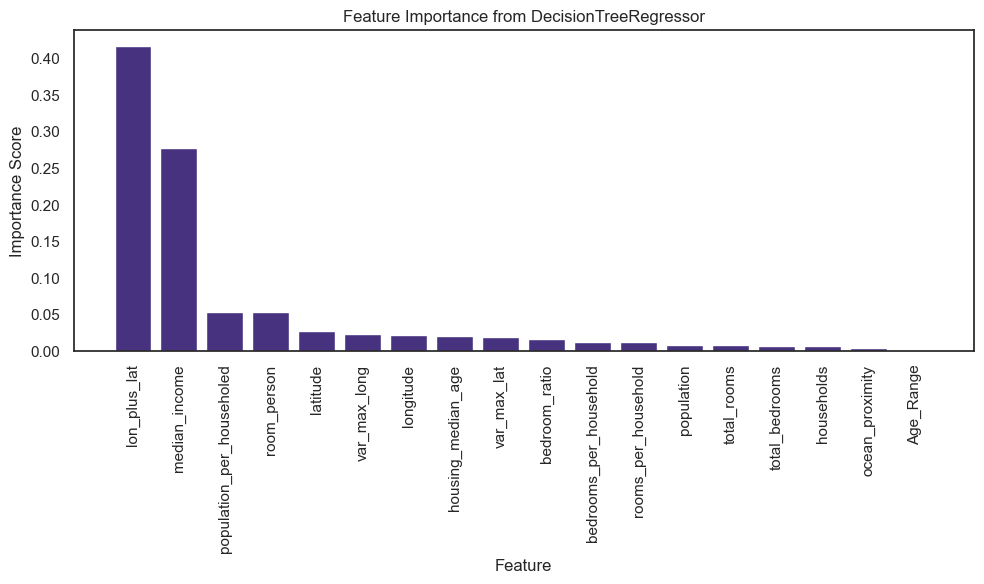

In [164]:
feature_importance = dt.feature_importances_
feature_names = X_train.columns

# Sort the feature names and importance scores in descending order of importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = feature_importance[sorted_indices]

# Plot the feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance from DecisionTreeRegressor')
plt.tight_layout()
plt.show()

#### Adaboost

In [165]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Choosing Decision Tree with max_depth=2 as the weak learner for regression
DTR = DecisionTreeRegressor(max_depth=2)

# Create the AdaBoost regressor with n_estimators=20 and learning_rate=0.01
ada = AdaBoostRegressor(base_estimator=DTR, n_estimators=20, learning_rate=0.01)

# Train the model on the training data
ada.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = ada.predict(X_test)

# Evaluate the model using regression evaluation metrics
mse = mean_squared_error(y_test, y_pred)
ada_score = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", ada_score)


Mean Squared Error (MSE): 0.13553153766762002
R-squared (R2): 0.5549978968785323


In [166]:
# !pip install xgboost
from xgboost import XGBRegressor

#### XGBOOST

In [167]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:linear', seed=42)
eval_set=[(X_train, y_train),(X_test,y_test),]
xgb.fit(X_train, y_train,
          early_stopping_rounds=200,
          eval_set=eval_set,
          eval_metric='mae',
          verbose=True)

[14:31:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:8.10161	validation_1-mae:8.10886
[1]	validation_0-mae:5.67223	validation_1-mae:5.67998
[2]	validation_0-mae:3.97166	validation_1-mae:3.97992
[3]	validation_0-mae:2.78125	validation_1-mae:2.79051
[4]	validation_0-mae:1.94803	validation_1-mae:1.95730
[5]	validation_0-mae:1.36488	validation_1-mae:1.37334
[6]	validation_0-mae:0.95702	validation_1-mae:0.96656
[7]	validation_0-mae:0.67212	validation_1-mae:0.68221
[8]	validation_0-mae:0.47486	validation_1-mae:0.48640
[9]	validation_0-mae:0.34194	validation_1-mae:0.35562
[10]	validation_0-mae:0.25720	validation_1-mae:0.27246
[11]	validation_0-mae:0.20762	validation_1-mae:0.22431
[12]	validation_0-mae:0.17835	validation_1-mae:0.19566
[13]	validation_0-mae:0.16361	validation_1-mae:0.18183
[14]	vali

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [169]:
y_pred = xgb.predict(X_test)
xg_score  = r2_score(y_test, y_pred)
xg_score

0.854657430043327

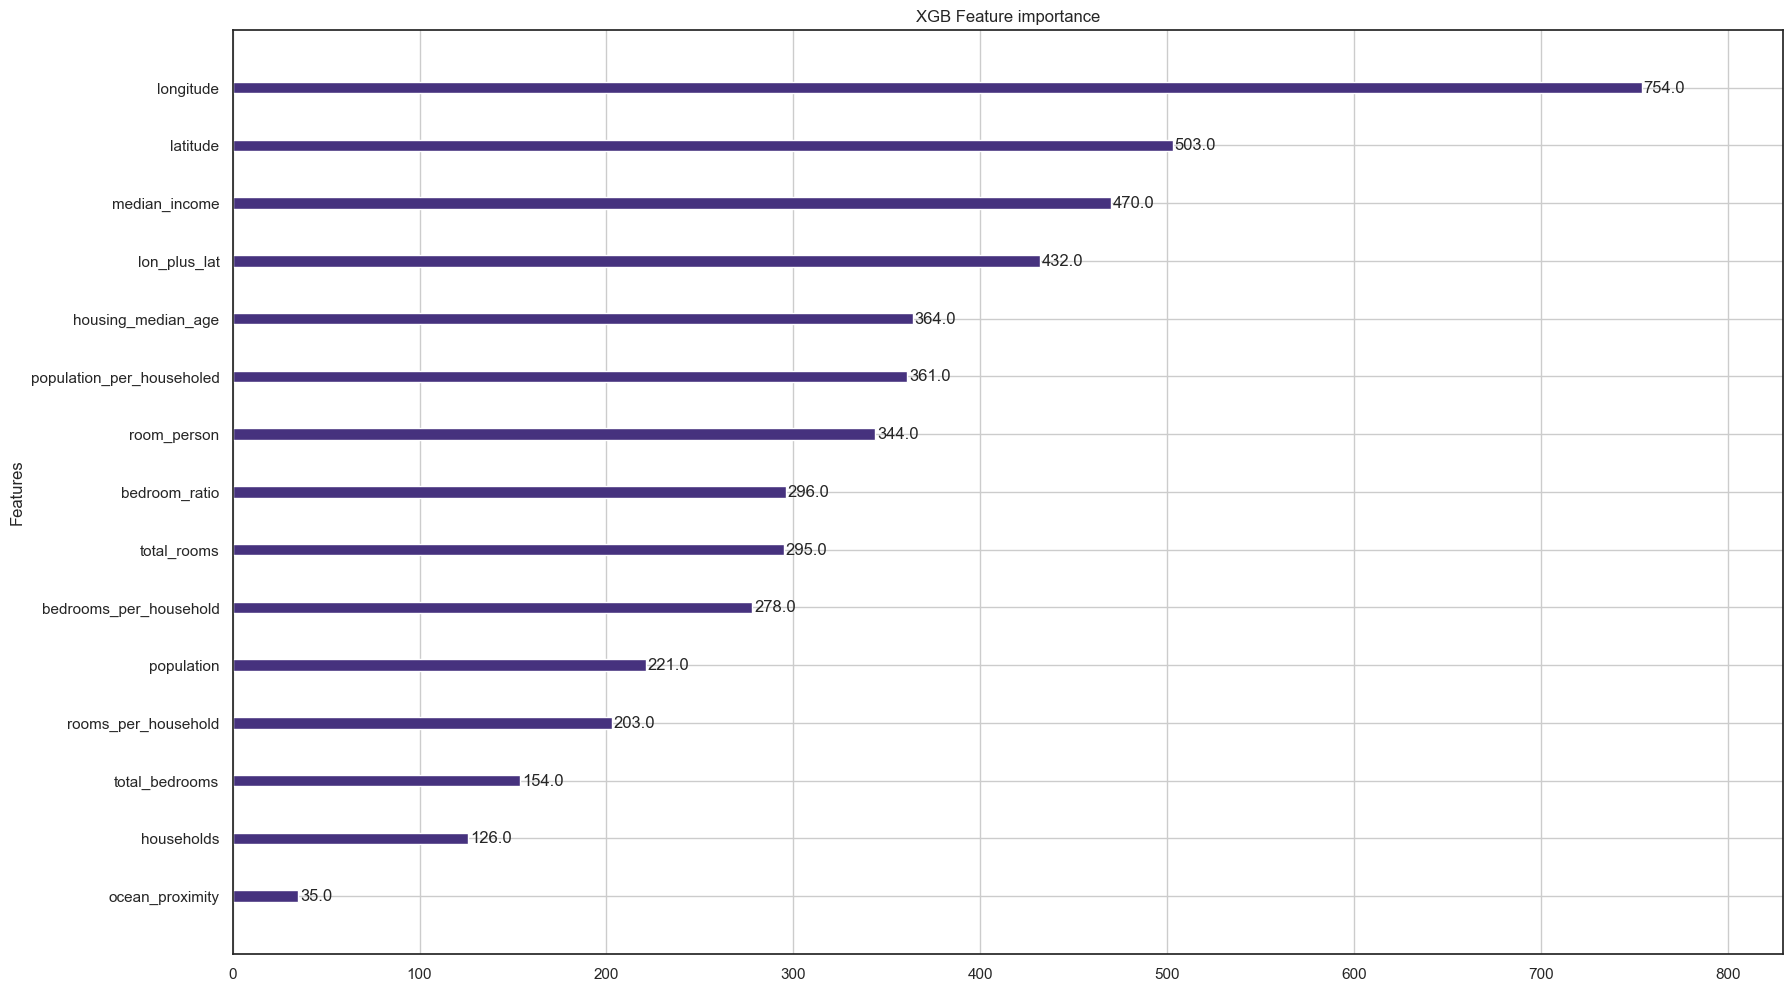

In [110]:
from xgboost import plot_importance
fig, ax = plt.subplots(1,1,figsize=(20,12))
plot_importance(xgb,ax=ax, xlabel=None)
plt.title('XGB Feature importance')
plt.show()

#### MLP

In [171]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', 
                             alpha=0.0001, batch_size='auto', learning_rate='constant',
                             learning_rate_init=0.001, max_iter=400, random_state=42)

mlp_regressor.fit(X_train, y_train)
y_pred = mlp_regressor.predict(X_valid)

mse = mean_squared_error(y_valid, y_pred)
mlp_score  = r2_score(y_valid, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", mlp_score)


Mean Squared Error (MSE): 3441553983.383747
R-squared (R2): 0.7131203054959213


#### Optuna with XGboost

In [117]:
import optuna
import warnings
warnings.filterwarnings("ignore")

In [68]:
def objective(trial):
    params ={
        'tree_method':'auto', 
        'sampling_method': 'gradient_based',
        'lambda': trial.suggest_loguniform('lambda', 2.0, 15.0),
        'alpha': trial.suggest_loguniform('alpha', 2.0, 15.0),
#         'eta': trial.suggest_categorical('eta', [0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
#         'gamma': trial.suggest_categorical('gamma', [16, 17, 18, 19, 20, 21, 22, 23]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.025,0.027,0.032,0.014,0.017,0.018, 0.023]),
        'n_estimators': trial.suggest_int('n_estimators',100, 1200),
        'min_child_weight': trial.suggest_int('min_child_weight', 5, 500), 
#         'max_depth': trial.suggest_categorical('max_depth', [4, 5, 6, 7,8])
    }
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=0.2, random_state=0)
    X1=sc.fit_transform(X_train)
    X2=sc.fit_transform(X_test)
    model=XGBRegressor(**params)
    model.fit(X1, y_train, eval_set=[(X2, y_test)],early_stopping_rounds=20,verbose=False,eval_metric='mae')
    predict= model.predict(X2)
    score =r2_score(predict, y_test)
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40)
best_params = study.best_params
best_score = -study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

[I 2023-07-24 16:45:56,540] A new study created in memory with name: no-name-ab32eef4-365b-4bef-b3f8-0a27fa717bff
[I 2023-07-24 16:45:57,708] Trial 0 finished with value: -2.397077674597182 and parameters: {'lambda': 6.948917155770627, 'alpha': 9.898221622814694, 'learning_rate': 0.018, 'n_estimators': 160, 'min_child_weight': 400}. Best is trial 0 with value: -2.397077674597182.
[I 2023-07-24 16:46:06,140] Trial 1 finished with value: 0.7978442314666382 and parameters: {'lambda': 3.4199940912016142, 'alpha': 9.680442712336587, 'learning_rate': 0.032, 'n_estimators': 650, 'min_child_weight': 237}. Best is trial 1 with value: 0.7978442314666382.
[I 2023-07-24 16:46:23,767] Trial 2 finished with value: 0.7984812692313152 and parameters: {'lambda': 2.766655261188055, 'alpha': 3.7548379235099167, 'learning_rate': 0.014, 'n_estimators': 1080, 'min_child_weight': 153}. Best is trial 2 with value: 0.7984812692313152.
[I 2023-07-24 16:46:33,167] Trial 3 finished with value: 0.7831982106667277 

[I 2023-07-24 16:54:53,778] Trial 30 finished with value: 0.727321824732672 and parameters: {'lambda': 3.3440509680436543, 'alpha': 3.0580857671210886, 'learning_rate': 0.023, 'n_estimators': 250, 'min_child_weight': 227}. Best is trial 21 with value: 0.8268996474729247.
[I 2023-07-24 16:55:17,693] Trial 31 finished with value: 0.8249057572431353 and parameters: {'lambda': 4.250513401308234, 'alpha': 2.083979922579682, 'learning_rate': 0.025, 'n_estimators': 1187, 'min_child_weight': 13}. Best is trial 21 with value: 0.8268996474729247.
[I 2023-07-24 16:55:34,766] Trial 32 finished with value: 0.8200845234434502 and parameters: {'lambda': 4.372794179059032, 'alpha': 2.0213886349122165, 'learning_rate': 0.025, 'n_estimators': 1189, 'min_child_weight': 36}. Best is trial 21 with value: 0.8268996474729247.
[I 2023-07-24 16:55:57,855] Trial 33 finished with value: 0.8111133521870191 and parameters: {'lambda': 4.013612384071906, 'alpha': 2.6257927206038807, 'learning_rate': 0.014, 'n_estima

Best Parameters: {'lambda': 4.468463727712199, 'alpha': 2.300794979150857, 'learning_rate': 0.025, 'n_estimators': 1196, 'min_child_weight': 5}
Best Score: -0.8268996474729247


In [ ]:
#plot parameter relatiosnsship
fig = optuna.visualization.plot_rank(study, params=["learning_rate" ,"lambda"])
fig.show()

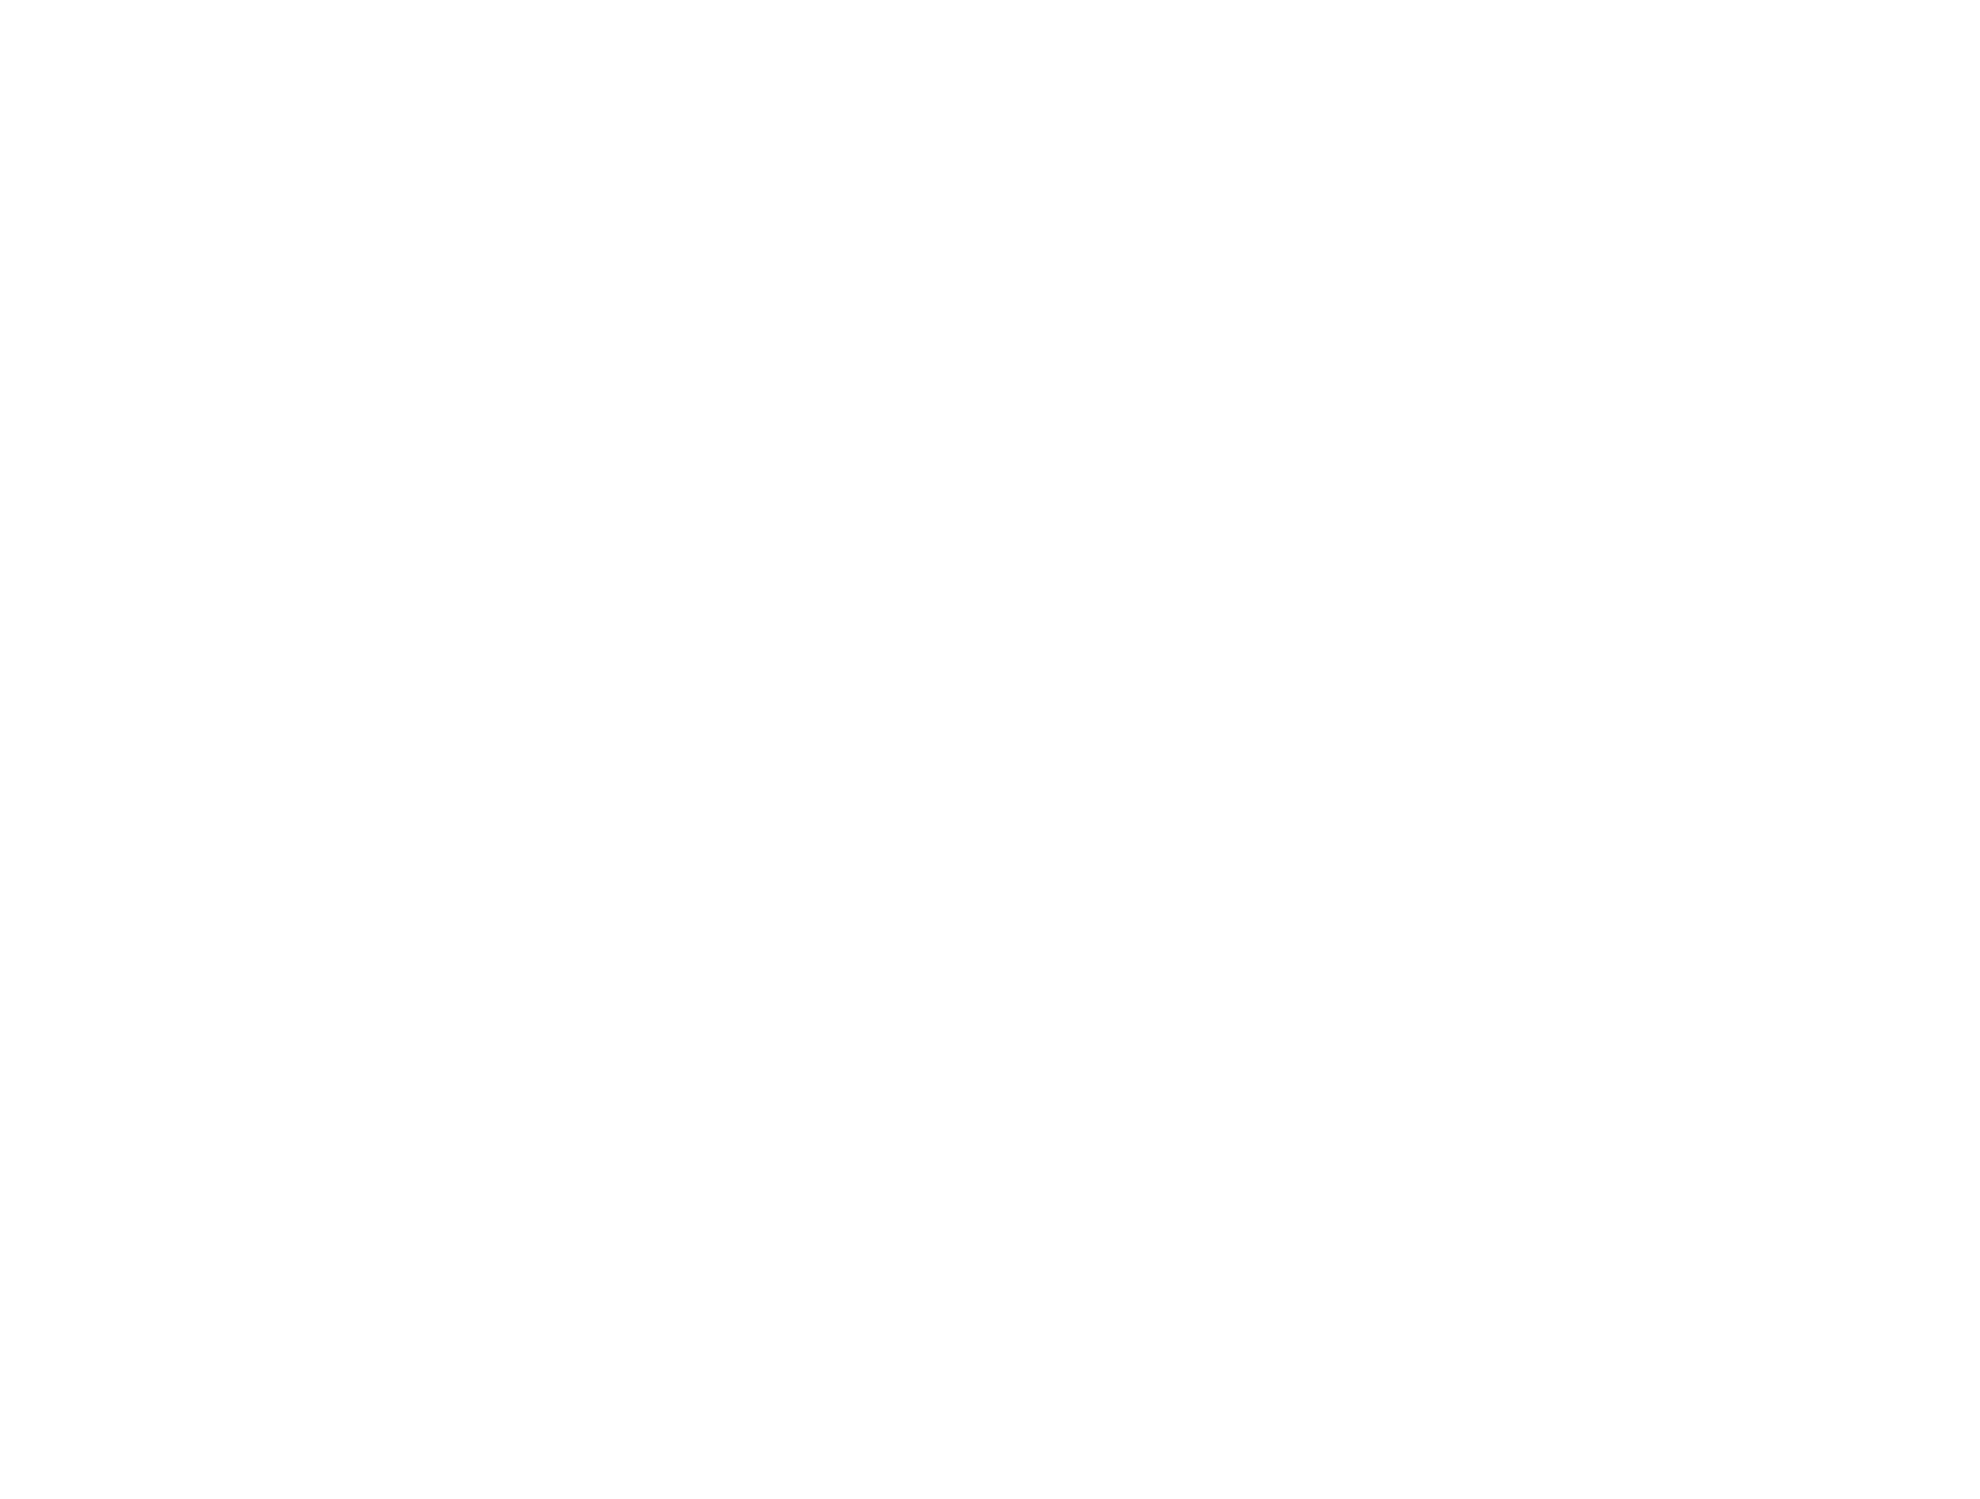

In [71]:
fig = optuna.visualization.plot_param_importances(study)
fig.update_layout(template='simple_white')

In [72]:
fig = optuna.visualization.plot_timeline(study)
fig.show()

In [172]:
best_model = XGBRegressor(**study.best_params)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=2.195022510103893,
             learning_rate=0.027, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=8, missing=nan,
             monotone_constraints=None, n_estimators=1136, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [135]:
r2_score(y_test, best_model.predict(X_test))

0.8652345285127185

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


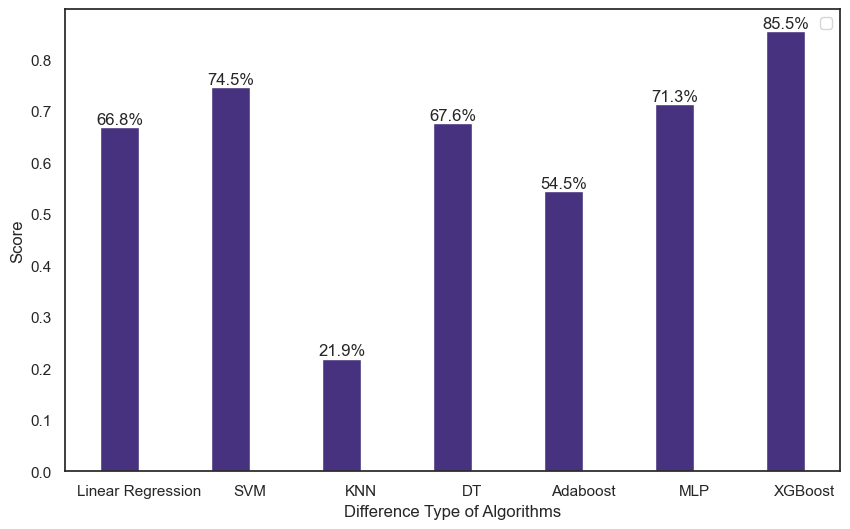

In [63]:
# Algorithms to compare
algorithms = ['Linear Regression', 'SVM', 'KNN', 'DT', 'Adaboost','MLP','XGBoost' ]

# mlp_score xg_score ada_score dt_score svr_score knn_score lr_score
score =[lr_score, svr_score, knn_score, dt_score, ada_score, mlp_score, xg_score]

# Bar plot comparing precision with and without smoothing
plt.figure(figsize=(10, 6))
width = 0.35
bars1 = plt.bar(np.arange(len(algorithms)), score, width)
plt.xticks(np.arange(len(algorithms)) + width / 2, algorithms)
plt.xlabel('Difference Type of Algorithms')
plt.ylabel('Score')


# Add percentage values on top of each bar
for bar in bars1:
    height1 = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height1, f'{height1:.1%}', ha='center', va='bottom')

plt.legend()
plt.show()

### Workflow if California House Prices Dataset

This notebook contain the code of mention dataset. Basically this is Regression Dataset, Regression define output as contious way. From EDA to Feature Engineering & Model building everything have done in this notebook. 

#### Dataset :
This dataset have 20640 row and 10 column. Among 10 column all are numerical except `ocean_proximity` which is a categorical column & have 5 properties.

#### EDA
In this Section, Try to play data on various way and visualized. First check the missing values and have some which fillup with mode value of these column. Then try to do several plot like scatter plot between two variable to find their linear relarionship then KDE plot to find the nature of each column. After all that apply pairplot to identified relationship to the regressor or our main value which is `median_house_value`. Then look at the correlation matrix to find strogly positively corelated or negetively corelated column. After all the technique have to check outlier present or Not. If present then try to handle those by using `zscore`. After all that EDA convert categorical column into numerical and did a llittle bit feature Engineering.

#### Supervised Regression Algorithm:

**Metrics:** I used R-squaed metrics for determine the model performance. R_sqaued is a known of co-efficient of determination is a terms that used to identified the fitted score on Regression model.A score is close to 0 mean model not well and a score is close to 1 means model fitted very well, sometimes score close to 1 can't be very good or overfiting score if the model is complex and data have noise.
 
 **Linear Regression :** We all know about this Linear Model which have a classification model also. In this notebook I used simple linear regression model & got `0.668` r2_squared value.
 
 **SVM :** In SVM or SVR regressor model I used simple version with `rbf` kernel but standardScaller used in dataset section which give better r2_squared score `0.74526` than Linear Regression.
 
 **KNN :** In this model which have given worse r2_squared value `0.2185218`, In documantation said KNN is polpular on classification task not do very well on regression. KNN also highly sensetive on noise and outlier of the data also not work on high dimension space.
 
**Decision Tree :** This model works better than the other two model like Linear regression & KNN. This model produce `0.67914` r_sqaured score which is better.In this model I checked the importance feature using its default method.

**Adaboost:** Adaboost not done so well as I expected as a boosting algorithm. It have score `0.540818` which is less than Decision tree and Linear Regression.

**MLP :** Multi Layer Perceptron is a type of atrificial neural networks that consist interconnection on Multiple layer. If a feedforward neural network which means data flow in one direction without any cycle or feedback loops.

**XGBOOST** Best score achiever in this dataset, without any parameter tuning it achieved `0.854657`. Xgboost is a gradient boosting algorithm which works on gradually build weak learners and combines their prediction to make strong learning which we can call also ensemble learning. After using parameter tuning on optuna it gives better score than the normal one.


#### Result
There are several kind of model in Machine Learning sector, difference model have difference working way and in this dataset if we think without boosting model then it was the best for given such a brillaint score than others. But when we go one steps further then got better we can say best score which is `0.865234`. So for this dataset Xgboost with parameter tuning on Optuna is the winner.


#### Conclusion

Regression Terms is a popular section on machine learning, I aplied several model and did several EDA and feature engineering to achieve better score. Using Optuna on parameter tuning have faced several problems this xgboost not work well good with all parameters. In the further section there is a more scope to improve the score by using difference model like `hill-climbing` or `LGBM` or do some better feature engineering.
